# Data analysis on Cars datatset

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets\\USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## PreProcessing

### Function to convert 'Condition'
* This function returns the condition in hours
* It was divided into 3 unites (Days, Hours, Minutes)
* The expired cars were listed as 'Listing Expired', I changed those to zeros

In [3]:
def convert_to_hours(condition):
    parts = condition.split()
    if parts[1] == 'days':
        return 24 * int(parts[0])
    elif parts[1] == 'hours':
        return int(parts[0])
    elif parts[1] == 'minutes':
        return int(parts[0]) / 60
    else:
        return 0

df['condition_in_hours'] = df['condition'].apply(convert_to_hours)

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2499 non-null   int64  
 1   brand               2499 non-null   object 
 2   model               2499 non-null   object 
 3   year                2499 non-null   int64  
 4   title_status        2499 non-null   object 
 5   mileage             2499 non-null   float64
 6   color               2499 non-null   object 
 7   vin                 2499 non-null   object 
 8   lot                 2499 non-null   int64  
 9   state               2499 non-null   object 
 10  country             2499 non-null   object 
 11  condition           2499 non-null   object 
 12  condition_in_hours  2499 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 253.9+ KB


In [7]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition', 'condition_in_hours'],
      dtype='object')

In [8]:
df.drop(columns=['condition', 'condition_in_minutes'], inplace=True)

KeyError: "['condition_in_minutes'] not found in axis"

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')

## Report of the data
* The data is scattered around the mean, so it has alot of outliers which I can't remove because that will remove alot of data.

### condition_in_hours
* Maximum duration in dataset is 15 days (360 hours).
* Minimum is 0 (Expired).
* Most of the cars have about 55 hours left which is more than 75% of the cars listed.

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2499.00,18767.67,12116.09,0.00,10200.00,16900.00,25555.50,84900.00
year,2499.00,2016.71,3.44,1973.00,2016.00,2018.00,2019.00,2020.00
mileage,2499.00,52298.69,59705.52,0.00,21466.50,35365.00,63472.50,1017936.00
lot,2499.00,167691389.06,203877.21,159348797.00,167625331.00,167745058.00,167779772.00,167805500.00
condition_in_hours,2499.00,54.79,61.14,0.00,21.00,48.00,48.00,360.00


### mileage
* Maximum is 1017936.00 for the peterbilt model which is normal since it is a transportation truck.
* Minimum is 0.00 which are for car parts (doors, and chassis).
* Most of the cars have around 52298.69 of mileage, which is between 50% and 75% of the cars listed. 

In [106]:
df[df['mileage'] > 1_000_000]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition_in_hours
528,1025,peterbilt,truck,2010,salvage insurance,1017936.00,color:,1xp7d49x0ad793710,167529842,georgia,usa,17.00


In [111]:
df[df['mileage'] == 0]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition_in_hours
309,0,chevrolet,door,2004,salvage insurance,0.00,maroon,3gnek12t74g240524,167418651,wyoming,usa,18.00
322,0,ford,chassis,1994,salvage insurance,0.00,green,1fdee14n7rha47894,167359174,california,usa,19.00
504,100,peterbilt,truck,2012,salvage insurance,0.00,blue,1xp4d49x1cd144875,167529787,florida,usa,17.00
545,0,gmc,door,1993,salvage insurance,0.00,light blue,1gkfk16k5pj701631,167358601,colorado,usa,18.00
1236,4200,ford,door,2013,clean vehicle,0.00,no_color,1fadp3j23dl155179,167773673,pennsylvania,usa,48.00
1619,650,ford,door,2017,salvage insurance,0.00,black,1fadp3k21hl268441,167651911,california,usa,48.00


### Year
* Oldest car is camaro 1973 which is a clean vehicle and the only clean vehicle before 2000.
* The newest cars are of 2020 model
* Most of the lists before 2007 are salvage vehicle parts.
* Most of the cars listed have models around 2016, which are around 25% of the years listed.

In [128]:
df[df['year'] < 2007].groupby(df['mileage'] > 1000).count() # TODO: Understand this

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition_in_hours
mileage,,,,,,,,,,,,
False,3,3,3,3,3,3,3,3,3,3,3,3
True,52,52,52,52,52,52,52,52,52,52,52,52


In [132]:
df[df['year'] == 2022]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition_in_hours


### Price
* The minimum price is 0 which is mostly for car parts
* Maximum value is a mercedes-benz sl-class
* Most of the cars are listed around 12700 which is more than 50% of the cars

In [143]:
(df['price'] == 0).sum()

np.int64(43)

In [ ]:
df[df['price'] == 0]

In [145]:
df[df['price'] > 84000]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition_in_hours
502,84900,mercedes-benz,sl-class,2017,clean vehicle,25302.00,silver,wddjk7ea3hf044968,167607883,florida,usa,48.00


<Axes: xlabel='price'>

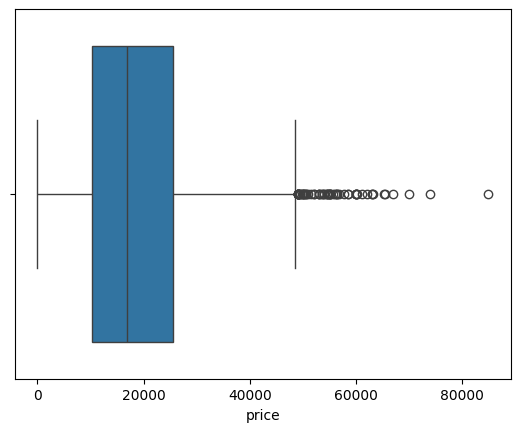

In [63]:
sns.boxplot(df['price'], orient='h')

<Axes: xlabel='year'>

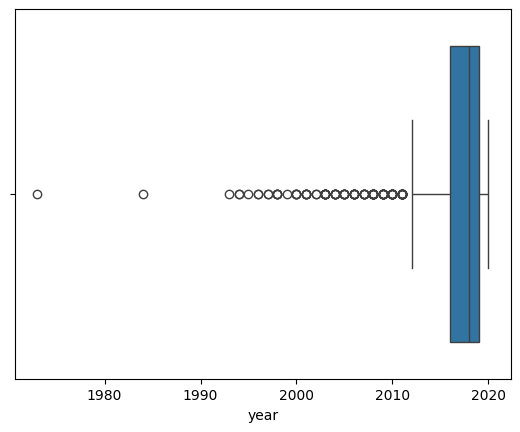

In [64]:
sns.boxplot(df['year'], orient='h')

<Axes: xlabel='mileage'>

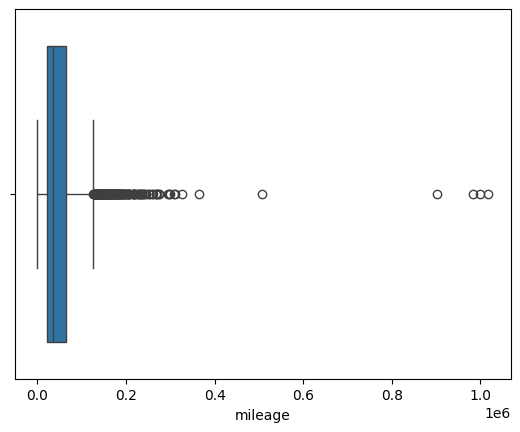

In [65]:
sns.boxplot(df['mileage'], orient='h')

### Standalone Test

<Axes: xlabel='year', ylabel='price'>

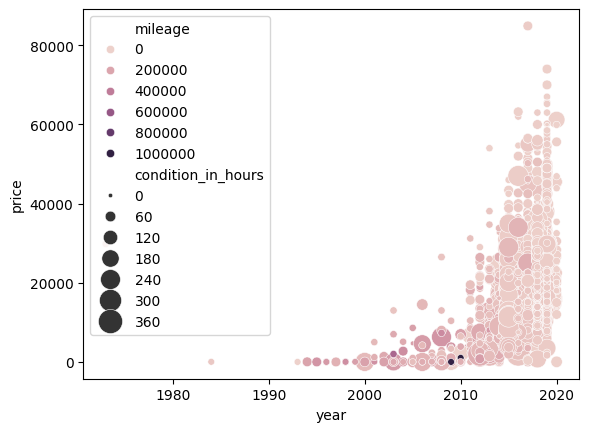

In [10]:
sns.scatterplot(x=df['year'], y=df['price'], size=df['condition_in_hours'], hue=df['mileage'], sizes=(10, 300))